In [1]:
import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix
# # from sklearn.metrics import precision_recall_curve
# from sklearn.metrics import precision_score
# from sklearn.metrics import average_precision_score
# from sklearn.metrics import recall_score
# from sklearn.metrics import f1_score 
# from sklearn.metrics import roc_curve
# from sklearn.metrics import auc
# from sklearn.metrics import multilabel_confusion_matrix
# from skimage.filters import threshold_otsu
# similarity_case_1_p = '../../../results/RF/simliarity_measure/case_1_ref_mask_similarity_measure.tif'
# similarity_case_2_p = '../../../results/RF/simliarity_measure/case_2_ref_mask_similarity_measure.tif'
# similarity_case_3_p = '../../../results/RF/simliarity_measure/case_3_ref_mask_similarity_measure.tif'
# binary_change_map = '../../../results/RF/binary_change_D/change_map_case_1.tif'
# similarity_change_map = '../../../results/RF/simliarity_measure/optimal_threshold/sim-change_map_case_1.tif'
# source_proba_distr = '../../../results/RF/simliarity_measure/2018_rf_model_1.npy'
# target_proba_distri = '../../../results/RF/simliarity_measure/2019_rf_model_1.npy'

gt_source_path  = '../../../data/rasterized_samples/2018_rasterizedImage.tif'
gt_target_path = '../../../data/rasterized_samples/2019_rasterizedImage.tif'
pred_source_path = '../../../results/RF/2018_rf_case_1_map.tif'
pred_target_path = '../../../results/RF/2019_rf_case_1_map.tif'
# certainty_source = '../../../results/RF/simliarity_measure/certainty/2018_certainty_1.tif'
# certainty_target = '../../../results/RF/simliarity_measure/certainty/2019_certainty_1.tif'

In [2]:
gt_source_ = rasterio.open(gt_source_path).read(1).flatten().astype('int')
gt_target_ = rasterio.open(gt_target_path).read(1).flatten().astype('int')
pred_source_ = rasterio.open(pred_source_path).read(1).flatten()
pred_target_ = rasterio.open(pred_target_path).read(1).flatten()

In [3]:
gt_mask_nodata = (gt_source_ != 0) & (gt_target_ != 0)

In [4]:
def mask_and_extract(array, mask_array):
    array = np.ma.masked_array(array, mask=True)
    array.mask[mask_array] = False
    array_value = np.ma.compressed(array)
    return array_value
gt_source_ = mask_and_extract(gt_source_, gt_mask_nodata)
gt_target_ = mask_and_extract(gt_target_, gt_mask_nodata)
pred_source_ = mask_and_extract(pred_source_, gt_mask_nodata)
pred_target_ = mask_and_extract(pred_target_, gt_mask_nodata)

In [5]:
print(gt_source_.shape)
print(gt_target_.shape)
print(pred_source_.shape)
print(pred_target_.shape)

(4021720,)
(4021720,)
(4021720,)
(4021720,)


In [6]:
df = pd.DataFrame({'gt_source': gt_source_, 'gt_target': gt_target_, 'pred_source': pred_source_, 'pred_target': pred_target_})

In [7]:
dict_={1: 'Dense built-up area',
2: 'Diffuse built-up area',
 3: 'Industrial and commercial areas',
 4: 'Roads',
 5: 'Oilseeds (Rapeseed)',
 6: 'Straw cereals (Wheat, Triticale, Barley)',
 7: 'Protein crops (Beans / Peas)',
 8: 'Soy',
 9: 'Sunflower',
 10: 'Corn',
 12: 'Tubers/roots',
 13: 'Grasslands',
 14: 'Orchards and fruit growing',
 15: 'Vineyards',
 16: 'Hardwood forest',
 17: 'Softwood forest',
 18: 'Natural grasslands and pastures',
 19: 'Woody moorlands',
 23: 'Water'}

In [8]:
import time
start_time =time.time()
df['gt_source'] = df['gt_source'].map(dict_)
df['gt_target'] = df['gt_target'].map(dict_)
df['pred_source'] = df['pred_source'].map(dict_)
df['pred_target'] = df['pred_target'].map(dict_)
print(" %s minute" % str((time.time() - start_time)/60))

 0.010749248663584392 minute


In [9]:
import time
start_time =time.time()
df['gt_change']= df.apply(lambda x: str(x['gt_source']) + '-' + str(x['gt_target']), axis=1)
df['pred_change']= df.apply(lambda x: str(x['pred_source']) + '-' + str(x['pred_target']), axis=1)
print(" %s minutes" % str((time.time() - start_time)/60))

 3.6236153125762938 minutes


In [10]:
cm = pd.crosstab(df['gt_change'], df['pred_change'], rownames=['Ground Truth'], colnames=['Prediction'])

In [11]:
cm['recall'] = 0
cm.loc['precision'] = 0
cm['f1'] = 0

In [12]:
# df['gt_change'].unique()

In [13]:
cm

Prediction,Corn-Corn,Corn-Diffuse built-up area,Corn-Grasslands,Corn-Industrial and commercial areas,Corn-Natural grasslands and pastures,Corn-Oilseeds (Rapeseed),Corn-Orchards and fruit growing,Corn-Protein crops (Beans / Peas),Corn-Soy,"Corn-Straw cereals (Wheat, Triticale, Barley)",...,Woody moorlands-Orchards and fruit growing,Woody moorlands-Protein crops (Beans / Peas),Woody moorlands-Softwood forest,Woody moorlands-Soy,"Woody moorlands-Straw cereals (Wheat, Triticale, Barley)",Woody moorlands-Sunflower,Woody moorlands-Vineyards,Woody moorlands-Woody moorlands,recall,f1
Ground Truth,,,,,,,,,,,,,,,,,,,,,
Corn-Corn,127286,26,18,4,0,15,0,7,417,250,...,0,0,0,0,0,0,0,0,0,0
Corn-Oilseeds (Rapeseed),0,0,1,1,0,357,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
Corn-Protein crops (Beans / Peas),0,4,0,1,0,12,0,897,0,0,...,0,0,0,0,0,0,0,0,0,0
Corn-Soy,271,0,8,8,2,0,1,0,32705,146,...,0,0,0,0,0,0,0,0,0,0
"Corn-Straw cereals (Wheat, Triticale, Barley)",0,3,1,27,0,1,0,0,0,36429,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woody moorlands-Soy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Woody moorlands-Straw cereals (Wheat, Triticale, Barley)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
Woody moorlands-Sunflower,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
for rname in cm.index:
    for cname in cm.columns:
        if rname == cname:
            cm['recall'].loc[rname] = (cm.loc[rname, cname] / cm.sum()[rname]) * 100 
            cm[cname].loc['precision'] = cm.loc[rname, cname] / cm.sum(axis = 1)[cname] * 100
            cm['f1'].loc[rname] = 2 * (cm.loc[rname, 'recall'] * cm.loc['precision', cname]) / (cm.loc[rname, 'recall'] + cm.loc['precision', cname])
            # cm.loc['precision'][cm.columns.get_loc(cname)] = (cm.loc[rname, cname] / cm.sum(axis = 1)[cname]) * 100

/share/etud/e2008987/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/share/etud/e2008987/.conda/envs/python_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


In [15]:
# cm

In [16]:
cm_ = cm[cm['recall'] != 0]

In [17]:
prec = cm.iloc[[-1]]

In [18]:
prec = prec.loc[:, (prec !=0).any(axis=0)]

In [19]:
t = prec.T

In [20]:
t['recall'] = cm_['recall']

In [21]:
t['f1'] = cm_['f1']

In [22]:
t.index.name = None

In [23]:
t.columns.name = None

In [24]:
# t.reset_index(drop=True, inplace=True)

In [25]:
t['changes'] = t.index
t

,precision,recall,f1,changes
Corn-Corn,93.488833,98.020130,95.700874,Corn-Corn
Corn-Oilseeds (Rapeseed),67.484507,92.010309,77.861720,Corn-Oilseeds (Rapeseed)
Corn-Protein crops (Beans / Peas),77.502703,92.378991,84.289500,Corn-Protein crops (Beans / Peas)
Corn-Soy,88.678050,95.603496,92.010641,Corn-Soy
"Corn-Straw cereals (Wheat, Triticale, Barley)",93.618885,95.020606,94.314538,"Corn-Straw cereals (Wheat, Triticale, Barley)"
...,...,...,...,...
Vineyards-Sunflower,35.525652,12.890625,18.917103,Vineyards-Sunflower
Vineyards-Vineyards,63.071866,99.935653,77.335428,Vineyards-Vineyards
Water-Water,98.931716,99.904330,99.415644,Water-Water
"Woody moorlands-Straw cereals (Wheat, Triticale, Barley)",0.587002,5.714286,1.064639,"Woody moorlands-Straw cereals (Wheat, Tritical..."


In [26]:
t.reset_index(drop=True, inplace=True)

In [27]:
t

,precision,recall,f1,changes
0,93.488833,98.020130,95.700874,Corn-Corn
1,67.484507,92.010309,77.861720,Corn-Oilseeds (Rapeseed)
2,77.502703,92.378991,84.289500,Corn-Protein crops (Beans / Peas)
3,88.678050,95.603496,92.010641,Corn-Soy
4,93.618885,95.020606,94.314538,"Corn-Straw cereals (Wheat, Triticale, Barley)"
...,...,...,...,...
65,35.525652,12.890625,18.917103,Vineyards-Sunflower
66,63.071866,99.935653,77.335428,Vineyards-Vineyards
67,98.931716,99.904330,99.415644,Water-Water
68,0.587002,5.714286,1.064639,"Woody moorlands-Straw cereals (Wheat, Tritical..."


In [28]:
def check_semantic_change(change_str):
    change_str = change_str.split("-")
    if change_str[0] == change_str[1]:
        return "no change"
    else:
        return "change"
    

In [29]:
t['cat'] = t['changes'].apply(check_semantic_change)

In [30]:
t['cat'].value_counts()

change       55
no change    15
Name: cat, dtype: int64

In [39]:
t_change = t[t['cat'] == 'change'].sort_values(by=['f1'], ascending=False)

In [40]:
t_change

,precision,recall,f1,changes,cat
56,99.165687,97.145470,98.145183,"Sunflower-Straw cereals (Wheat, Triticale, Bar...",change
50,98.869942,96.723090,97.784734,"Straw cereals (Wheat, Triticale, Barley)-Sunfl...",change
24,96.458345,97.815936,97.132397,"Oilseeds (Rapeseed)-Straw cereals (Wheat, Trit...",change
46,95.856579,96.398096,96.126574,"Straw cereals (Wheat, Triticale, Barley)-Oilse...",change
20,93.945905,97.677275,95.775261,Oilseeds (Rapeseed)-Corn,change
4,93.618885,95.020606,94.314538,"Corn-Straw cereals (Wheat, Triticale, Barley)",change
5,95.072599,93.257663,94.156386,Corn-Sunflower,change
45,94.532172,93.102010,93.811641,"Straw cereals (Wheat, Triticale, Barley)-Corn",change
59,86.884715,100.000000,92.982152,Tubers/roots-Corn,change
40,90.438692,95.159288,92.738957,Soy-Protein crops (Beans / Peas),change


In [52]:
t_nochange = t[t['cat'] == 'no change'].sort_values(by=['f1'], ascending=False)

In [53]:
t_nochange

,precision,recall,f1,changes,cat
67,98.931716,99.904330,99.415644,Water-Water,no change
0,93.488833,98.020130,95.700874,Corn-Corn,no change
16,96.498715,93.692664,95.074989,Hardwood forest-Hardwood forest,no change
41,90.215872,96.837583,93.409523,Soy-Soy,no change
38,85.679214,96.729708,90.869737,Softwood forest-Softwood forest,no change
27,79.814496,99.812229,88.700195,Orchards and fruit growing-Orchards and fruit ...,no change
13,83.458372,92.534006,87.762181,Grasslands-Grasslands,no change
37,69.735723,97.855316,81.436469,Roads-Roads,no change
17,68.623238,94.433259,79.485530,Industrial and commercial areas-Industrial and...,no change
66,63.071866,99.935653,77.335428,Vineyards-Vineyards,no change


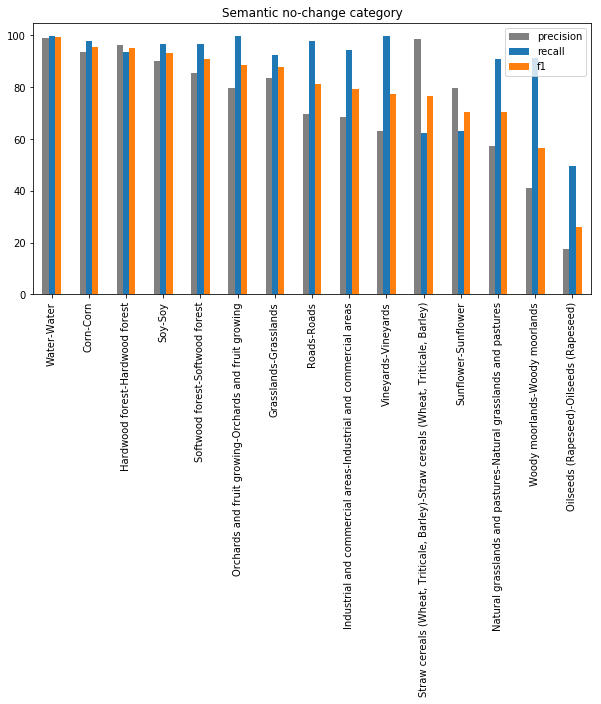

In [55]:
t_nochange.plot.bar(rot=0, figsize=(10,5), fontsize=10, color=['gray', '#1F77B4', '#FF7F0E'])
plt.xticks(range(len(t_nochange)), t_nochange['changes'], rotation=90)
plt.title('Semantic no-change category')
plt.show()

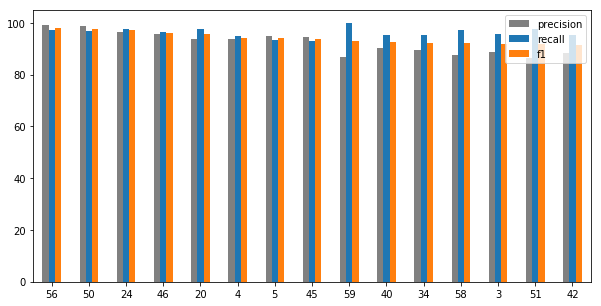

In [58]:
t_change.iloc[:15, :].plot.bar(rot=0, figsize=(10,5), fontsize=10, color=['gray', '#1F77B4', '#FF7F0E'])


In [60]:
for i in range(55,  11):
        print(i)

1
12
23
34
45


In [31]:
t.to_csv('t.csv')

In [32]:
t = t.sort_values('f1', ascending=False)

In [33]:
t.to_csv('t_sort.csv')

In [114]:
# cm_group = cm.groupby('f1')

In [115]:
# cm_group.boxplot()

In [118]:
# prec